In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.patches import Patch
import sys
import numpy as np
import os

colori_matplotlib = [
    "r", "b", "g", "c", "m", "y", "k",
    "royalblue", "limegreen", "tomato", "deepskyblue", "darkorchid", "goldenrod", "dimgray",
    "dodgerblue", "springgreen", "salmon", "skyblue", "mediumorchid", "khaki", "lightgray",
    "cornflowerblue", "palegreen", "lightcoral", "lightcyan", "lightpink", "lightyellow", "silver",
    "steelblue", "springgreen", "lightsalmon", "powderblue", "mediumvioletred", "gold", "gainsboro",
    "cornflowerblue", "chartreuse", "darkorange", "cadetblue", "mediumslateblue", "darkkhaki", "beige",
    "mediumblue", "mediumseagreen", "crimson", "darkturquoise", "darkslategray", "olive", "floralwhite",
    "mediumslateblue", "chartreuse", "darkorange", "cadetblue", "mediumslateblue", "darkkhaki", "beige",
]

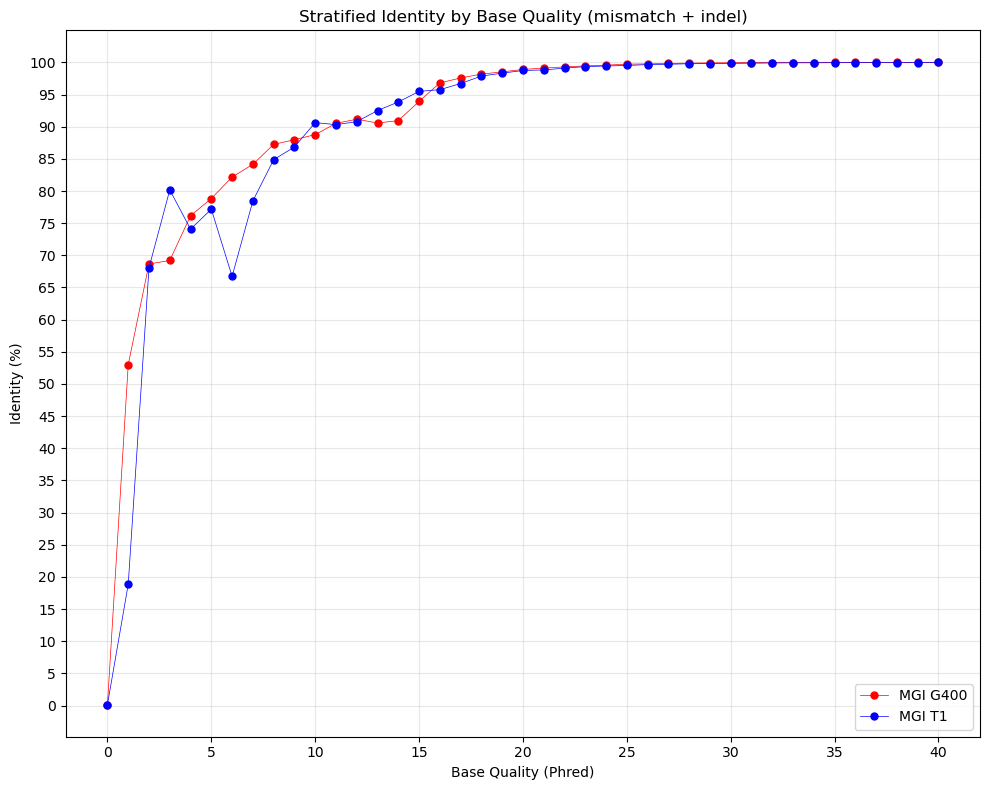

In [14]:
#plot_identity_BQ_stratification.py

# tsv_GM_V1 = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V1/IDENTITY_NA12878_GeneMind_GIAB_basequal_strat.tsv.gz.stats"
# tsv_GM_V2 = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V2/SnakeMake_Sequencing_Identity/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats"
# tsv_list = [tsv_GM_V1, tsv_GM_V2]
# label=["GeneMind V1", "GeneMind V2"]

tsv_MGI_G400 = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/G400/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats"
tsv_MGI_T1 = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/T1/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats"
tsv_list = [tsv_MGI_G400, tsv_MGI_T1]
label=["MGI G400", "MGI T1"]
    


fig, ax = plt.subplots(figsize=(10, 8))
for i in range(0, len(tsv_list)):
    dir = tsv_list[i]

    df = pd.read_csv(dir, sep="\t")
    df = df.dropna()
    # df["identity_filtered"] = df["identity_filtered"] * 100
    df["identity_with_ins_filtered"] = df["identity_with_ins_filtered"] * 100

    color = colori_matplotlib[(i) % len(colori_matplotlib)]
    # ax.plot(df['BaseQuality'], df['identity_filtered'], marker='o', color=color, label=label[i], linewidth=0.5, markersize=5)
    ax.plot(df['BaseQuality'], df['identity_with_ins_filtered'], marker='o', color=color, label=label[i], linewidth=0.5, markersize=5)

ax.set_title('Stratified Identity by Base Quality (mismatch + indel)')
ax.set_xlabel('Base Quality (Phred)')
ax.set_ylabel('Identity (%)')

ax.set_xticks(np.arange(0, max(df['BaseQuality']) + 1, 5))

#y and x lim
ax.set_yticks(np.arange(0, 105, 5))
ax.set_xticks(np.arange(0, 45, 5))

# #y and x lim
# ax.set_yticks(np.arange(98, 101, 0.5))
# ax.set_xticks(np.arange(20, 45, 2))
# ax.set_ylim(98, 101)
# ax.set_xlim(20, 46)


ax.grid(alpha=0.3)
ax.legend(loc="lower right")
plt.tight_layout()

/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/G400/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats
/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/T1/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats


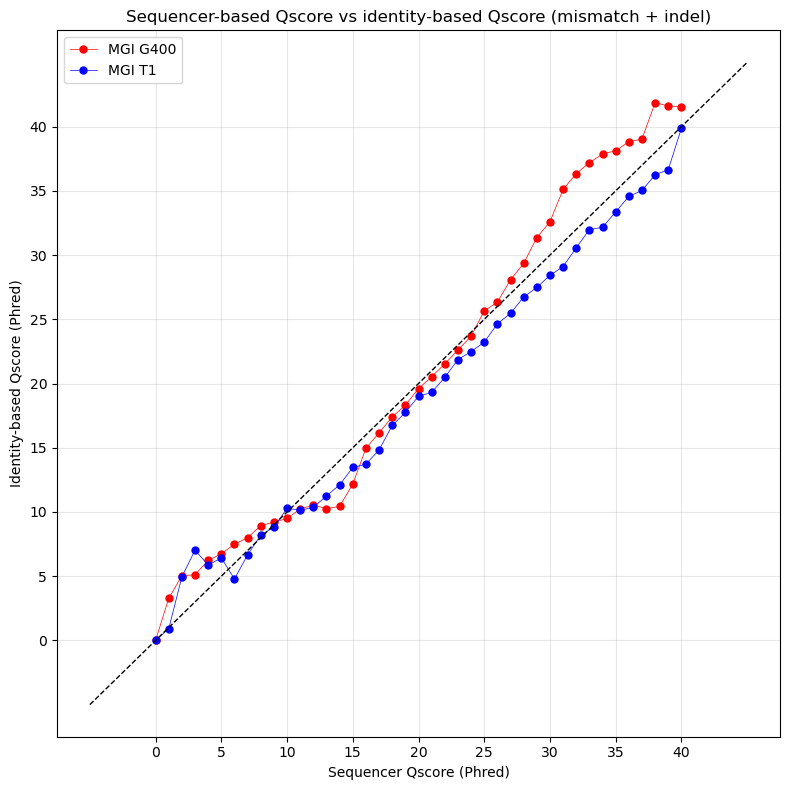

In [19]:
#plot_identity_BQ_stratifiction_Q_seq_to_real_Q.py

# tsv_GM_V1 = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V1/IDENTITY_NA12878_GeneMind_GIAB_basequal_strat.tsv.gz.stats"
# tsv_GM_V2 = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V2/SnakeMake_Sequencing_Identity/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats"
# tsv_list = [tsv_GM_V1, tsv_GM_V2]
# label=["GeneMind V1", "GeneMind V2"]

tsv_MGI_G400 = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/G400/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats"
tsv_MGI_T1 = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/T1/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats"
tsv_list = [tsv_MGI_G400, tsv_MGI_T1]
label=["MGI G400", "MGI T1"]

fig, ax = plt.subplots(figsize=(8, 8))
for i in range(len(tsv_list)):
    print(tsv_list[i])
    dir = tsv_list[i]

    df = pd.read_csv(dir, sep="\t")
    df = df.dropna()
    df["identity_with_ins_filtered"] = df["identity_with_ins_filtered"].apply(lambda x: -10*np.log10(1 - x))
    
    color = colori_matplotlib[(i) % len(colori_matplotlib)]
    ax.plot(df['BaseQuality'], df['identity_with_ins_filtered'], marker='o', color=color, label=label[i], linewidth=0.5, markersize=5)

ax.set_title('Sequencer-based Qscore vs identity-based Qscore (mismatch + indel)')
ax.set_xlabel('Sequencer Qscore (Phred)')
ax.set_ylabel('Identity-based Qscore (Phred)')

ax.set_xticks(np.arange(0, 45, 5))
ax.set_yticks(np.arange(0, 45, 5))

ax.plot([-5, max(df['BaseQuality']) + 5], [-5, max(df['BaseQuality']) + 5], 'k--', linewidth=1)

ax.grid(alpha=0.3)
ax.legend()
plt.tight_layout()
